<a href="https://colab.research.google.com/github/Theveetha/LendingClub_EDA_CaseStudy/blob/main/LendingClub_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Set 1
- Connect to the data
- Gather basic information on the data
- plot graphs if required for that
- understand the data
- First level of Data Preprocessing (remove columns or rows)

Set 2
- Understand the target column
- Univariant Analysis of all the columns
- Data Preprocessing post set 2

Set 3
- Bivariant Analysis

Set 4
- Multivariant Analysis

Set 5
- Observations

# ***Lending Club EDA Case Study***

Data: Lending Club is a company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant's profile. This dataset gives us a details of the applicant's and their current status.

To Analyse: Do a general EDA on how the various factors plays a role in applicant's loan status.

## **Import Required Libraries**

In [167]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Mount Drive**

In [168]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Import and read the dataset**

In [169]:
file_path = '/content/drive/MyDrive/Stats&ML_Dataset/loan.csv'
original_data = pd.read_csv(file_path)

# To display all columns and all rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# Creating a copy to work on the analysis
data = original_data.copy()
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## **Understanding the data**

##### **Checking the dimensions**

In [170]:
data.shape
print(f"Number of Features : {data.shape[1]}")
print(f"Number of Records : {data.shape[0]}")

Number of Features : 111
Number of Records : 39717


##### **Columns before preprocessing data**

In [171]:
print("Features before preprocessing the data")
col = []
for cols in data.columns:
  col.append(cols)
print(col)

Features before preprocessing the data
['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m'

##### **Missing values in the dataframe**

In [172]:
# Function to remove the border in graph
def section(sec):
  sec.spines['bottom'].set_visible(True)
  sec.spines['top'].set_visible(False)
  sec.spines['left'].set_visible(False)
  sec.spines['right'].set_visible(False)
  return sec

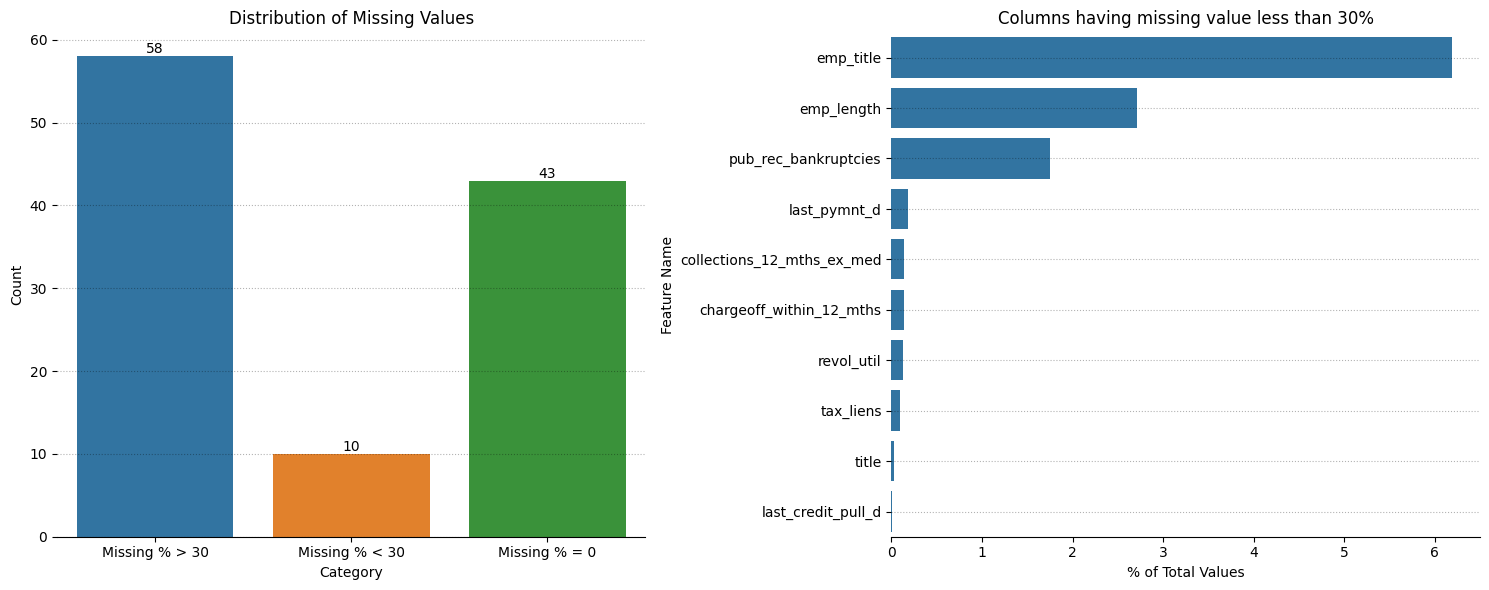

In [173]:
mis_val = data.isnull().sum()
mis_val_percent = round(100 * data.isnull().sum()/len(data),2)
mis_val_table = pd.concat([mis_val,mis_val_percent],axis=1)
mis_val_table.columns = ['Missing Values', '% of Total Values']
mis_val_table = mis_val_table.sort_values('% of Total Values',ascending=False)

Category = []
for i in range(0,len(mis_val_table)):
  if mis_val_table['% of Total Values'][i] == 0:
    Category.append('Missing % = 0')
  elif 0 < mis_val_table['% of Total Values'][i] <= 30:
    Category.append('Missing % < 30')
  else:
    Category.append('Missing % > 30')

mis_val_table['Category'] = Category

mis_val_gt30 = mis_val_table[mis_val_table['Category'] == 'Missing % > 30']
mis_val_lt30 = mis_val_table[mis_val_table['Category'] == 'Missing % < 30']
mis_val_0 = mis_val_table[mis_val_table['Category'] == 'Missing % = 0']

# Graphical representation
fig = plt.figure(figsize=(15,6))

sec1 = plt.subplot(1,2,1)
sec1.set_title("Distribution of Missing Values")
viz = sns.countplot(data=mis_val_table, x='Category',hue='Category')
for containers in viz.containers:
  viz.bar_label(containers)
viz.set_xlabel('Category')
viz.set_ylabel('Count')
viz.grid(axis='y', linestyle=':', color='black', alpha=0.3)
section(sec1)

sec2 = plt.subplot(1,2,2)
sec2.set_title("Columns having missing value less than 30%")
viz = sns.barplot(data=mis_val_lt30,x='% of Total Values',y=mis_val_lt30.index)
viz.grid(axis='y', linestyle=':', color='black', alpha=0.3)
viz.set_ylabel('Feature Name')
section(sec2)

plt.tight_layout()
plt.show()

##### **OBSERVATION - COLUMNS**
Columns having more than 30% missing value (58 columns) will lead to biased output.

Columns having more than 0% and less than 30% missing values (10 columns) need to be treated for further analysis.

***To Do:***
1. Remove those 58 columns from our dataframe
2. Treat the missing values for those 10 columns in preprocessing step - This to be handled post treating outliers

##### **Find Duplicate Rows**

In [174]:
count = data[data.duplicated()].shape
print(f"There are no duplicates in the dataset" if count[0]==0 else f"There are {count[0]} duplicates in the dataset")

There are no duplicates in the dataset


##### **OBSERVATION - ROWS**
There are no Duplicate records in the dataset.

***To Do:***

There is no action required

##### **Data Preprocessing**

In [175]:
data.drop(columns=mis_val_gt30.index,inplace=True)
print(f"Post cleanup there are {data.shape[1]} columns present in our dataframe")

Post cleanup there are 53 columns present in our dataframe


## **Understanding Numerical and Categorical Columns**

##### **Numerical and Categorical Columns**

In [176]:
num, obj = 0,0
for feature in data.columns:
  if data.dtypes[feature] != 'O':
    num += 1
  else:
    obj += 1
label = ['Numerical','Categorical']
count = [num,obj]
data_dict = {'Columns':label,'Count':count}
pd.DataFrame(data_dict)

,Columns,Count
0,Numerical,31
1,Categorical,22


##### **Analysis on Categorical Column**

In [197]:
cat_cols_df = pd.DataFrame(data.select_dtypes('object').apply(pd.Series.nunique, axis = 0))
cat_cols_df.reset_index(inplace=True)
cat_cols_df.columns = ['Column Name', 'Unique Values Count']
cat_cols_df.sort_values('Unique Values Count',ascending=True,inplace=True)

###### Categorical Columns with single unique value

In [198]:
cat_cols_df[cat_cols_df['Unique Values Count'] == 1]

,Column Name,Unique Values Count
10,pymnt_plan,1
18,initial_list_status,1
21,application_type,1


###### Categorical Columns having all values as unique

In [200]:
cat_cols_df[cat_cols_df['Unique Values Count'] == data.shape[0]]

,Column Name,Unique Values Count
11,url,39717


#### **OBSERVATION - CATEGORICAL COLUMN**
The categorical columns which are having single value doesn't impact or aid our analysis.

The categorical columns which have all the values to be unique also doesn't aid with our current analysis.

***To Do:***

Remove these 4 columns from the dataframe